# Spam Filtering with SVM - Text Classification into 


Text messages received from various sources mat be categorized as Spam and Not-spam (Ham).

In this notebook, we build a ML model using Support Vector Machine to classify Smap/Ham text-messages.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import svm

from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


## Exploring the Dataset

In [2]:
data = pd.read_csv('spam.csv', usecols=['v1','v2'], encoding='latin-1')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [4]:
data.head(n=10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Distribution spam/non-spam emails : Bar Plots

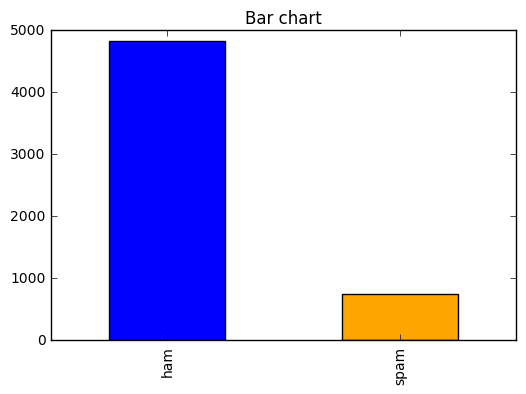

In [5]:
count_Class=pd.value_counts(data["v1"], sort= True)

count_Class.plot(kind= 'bar', color= ["blue", "orange"])

plt.title('Bar chart')

plt.show()

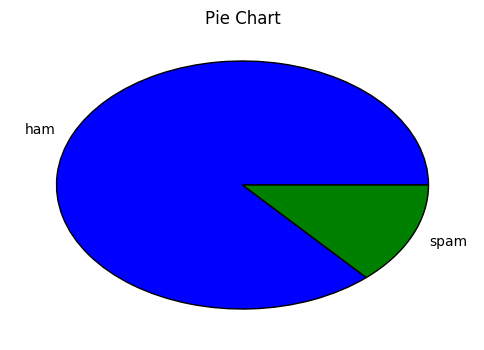

In [6]:
count_Class.plot(kind = 'pie')
plt.title('Pie Chart')
plt.ylabel('')
plt.show()

## Text Analytics

We want to find the **frequencies of words** in the spam and non-spam messages. 

The words of the messages will be model features (most frequent words).

We use the function Counter.

### Find Most Frequest Words in the Ham Messages

In [7]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

print(df1)

   words in non-spam  count
0                 to   1530
1                you   1458
2                  I   1436
3                the   1019
4                  a    969
5                and    738
6                  i    736
7                 in    734
8                  u    645
9                 is    638
10                my    619
11                me    537
12                of    498
13               for    475
14              that    398
15                it    375
16              your    373
17                on    352
18              have    346
19                at    333


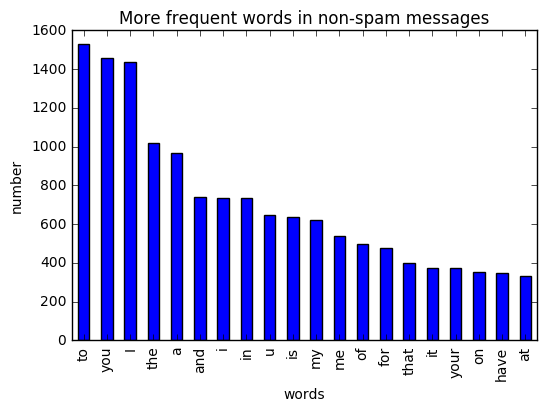

In [8]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

### Find Most Frequest Words in the Spam Messages

In [9]:
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})
print(df2)

   words in spam  count_
0             to     604
1              a     358
2           your     187
3           call     185
4             or     185
5            the     178
6            for     169
7              2     169
8            you     164
9             is     143
10          Call     136
11            on     135
12          have     128
13           and     119
14          from     116
15            ur     107
16          with     101
17             &      98
18             4      93
19            of      93


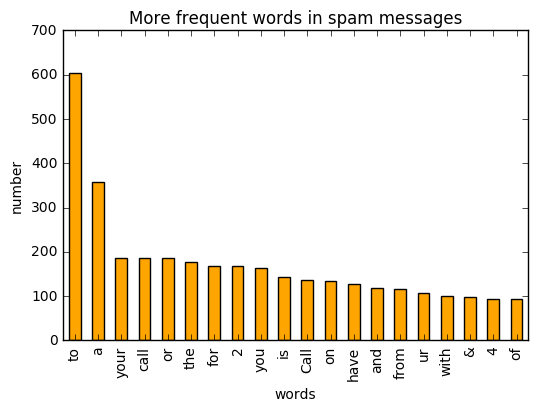

In [10]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that the majority of frequent words in both classes are stop words such as 'to', 'a', 'or' and so on.

With stop words we refer to the most common words in a language, there is no simgle, universal list of stop words.

## Feature Extraction from the Text

Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors.

We remove the stop words in order to improve the analytics

In [11]:
f = CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)


(5572, 8404)

Here, 5572 is the total number of message in the dataset/curpus.

Total 8404 unique worrds are there in the corpus (including special characters/strings and non-english words).

In [12]:
# List of features - each feature is a unique word in the dataset
features=f.get_feature_names()
print(features)

print(len(features))

[u'00', u'000', u'000pes', u'008704050406', u'0089', u'0121', u'01223585236', u'01223585334', u'0125698789', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07', u'07008009200', u'07046744435', u'07090201529', u'07090298926', u'07099833605', u'07123456789', u'0721072', u'07732584351', u'07734396839', u'07742676969', u'07753741225', u'0776xxxxxxx', u'07781482378', u'07786200117', u'077xxx', u'078', u'07801543489', u'07808', u'07808247860', u'07808726822', u'07815296484', u'07821230901', u'078498', u'07880867867', u'0789xxxxxxx', u'07946746291', u'0796xxxxxx', u'07973788240', u'07xxxxxxxxx', u'08', u'0800', u'08000407165', u'08000776320', u'08000839402', u'08000930705', u'08000938767', u'08001950382', u'08002888812', u'08002986030', u'08002986906', u'08002988890', u'08006344447', u'0808', u'08081263000', u'08081560665', u'0825', u'083', u'0844', u'08448350055', u'08448714184', u'0845', u'08450542832', u'08

In [13]:
print(data.iloc[6,1])

print(features.index('brother'))
print(features.index('speak'))
print(features.index('treat'))
print(features.index('patent'))


Even my brother is not like to speak with me. They treat me like aids patent.
1674
6910
7634
5546


In [14]:
print(X.toarray()[6][1674:1700]) # brother
print(X.toarray()[6][6909:7000]) # speak
print(X.toarray()[6][7600:7650]) # treat
print(X.toarray()[6][5540:5550]) # parent


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]


We have created more than 8400 new features. 

The new feature  j  in the row  i is equal to 1 if the word  wj  appears in the text example  i . It is zero if not.

## Predictive Analysis

Our goal is to predict if a new sms is spam or non-spam. 

Our assumption is that it is much worse to misclassify a non-spam message as spam than misclassify an spam as non spam.
i.e. we want to reduce the false positives. The reason is because most of the users normally don't check the spam messages.

The two possible situations are:

New spam sms in my inbox. (False Negative). >> We generally detect and delete it.

New non-spam sms in my spam folder (False positive). >> We probably don't read it.

We prefer the first option!!!

First we transform the variable spam/non-spam into binary variable, then we split our data set in training set and test set.

In [15]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})

y=data["v1"]

#print(y)


## Splitting Data into Traiing and Test Set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


### Distribution of Spam/Ham in the Training and Test Dataset

In [17]:

train_spam=sum(y_train==1)
train_ham=sum(y_train==0)

print('\n Number of observations of class Spam in Training Set = {}'.format(train_spam))
print(' Number of observations of class Ham in Training Set = {}'.format(train_ham))


test_spam=sum(y_test==1)
test_ham=sum(y_test==0)

print('\n Number of observations of class Spam in Test Set = {}'.format(test_spam))
print(' Number of observations of class Ham in Test Set = {}'.format(test_ham))




 Number of observations of class Spam in Training Set = 502
 Number of observations of class Ham in Training Set = 3231

 Number of observations of class Spam in Test Set = 245
 Number of observations of class Ham in Test Set = 1594


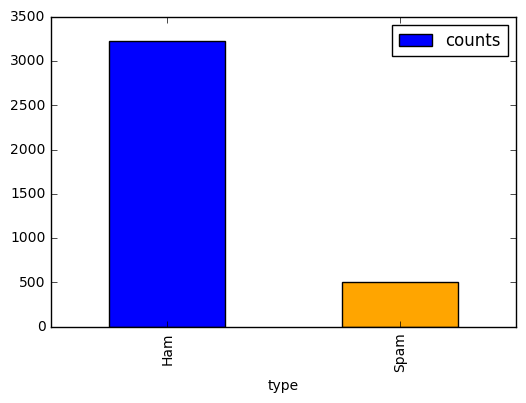

In [18]:

df = pd.DataFrame({'type':['Ham', 'Spam'], 'counts':[train_ham, train_spam]})
ax=df.plot.bar(x='type', y='counts', color= ["blue", "orange"])


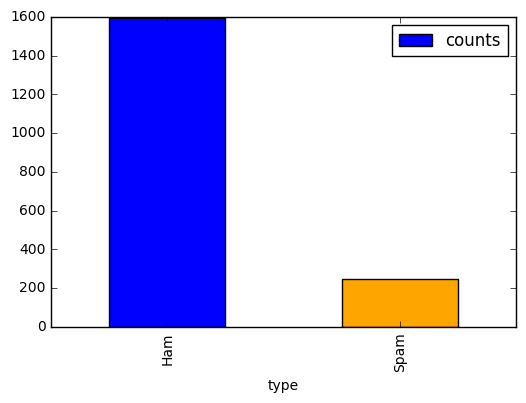

In [19]:
df = pd.DataFrame({'type':['Ham', 'Spam'], 'counts':[test_ham, test_spam]})
ax=df.plot.bar(x='type', y='counts', color= ["blue", "orange"])


## Train and Evaluate the a SVM Classifier

In [20]:

model = svm.SVC(C=0.01, kernel='linear', gamma=0.001)

print ("\n Training the model......\n")

# Train model
model.fit(X_train, y_train)
print ("\n Training completed successfully.....\n")


# Test the model
predicted_labels = model.predict(X_test)

print ("\n Evaluating SVM on Test Data : ")

print ("\n Accuracy score : ")
print (metrics.accuracy_score(y_test, predicted_labels))

print ("\n Confusion Matrix : ")
print (metrics.confusion_matrix(y_test, predicted_labels))

print ("\n Recall : ")
print (metrics.recall_score(y_test, predicted_labels))

print ("\n Precision : ")
print (metrics.precision_score(y_test, predicted_labels))





 Training the model......


 Training completed successfully.....


 Evaluating SVM on Test Data : 

 Accuracy score : 
0.958673191952148

 Confusion Matrix : 
[[1594    0]
 [  76  169]]

 Recall : 
0.689795918367347

 Precision : 
1.0


## SVM Hyperparameters

### Regularization Parameter. It tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

**C** : float, optional (default=1.0)
Penalty parameter C of the error term.



### Kernel Functions - Transformations applied to data to project into higher dimensional space in order to find suitale class separation in the transformed space.

**kernel** : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. 
It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).



### Gamma - The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.


**gamma** : float, optional (default=’auto’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

Current default is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma. The current default of gamma, ‘auto’, will change to ‘scale’ in version 0.22. ‘auto_deprecated’, a deprecated version of ‘auto’ is used as a default indicating that no explicit value of gamma was passed.



**degree** : int, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.


**coef0** : float, optional (default=0.0)
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

## Experiment with Regularization Hyper-parameter of SVM

In [21]:
list_C = np.arange(0.1, 1.1, 0.1) # [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))

count = 0

for c in list_C:
    model = svm.SVC(C=c, gamma='auto', kernel='linear')
    model.fit(X_train, y_train)
    
    score_train[count] = model.score(X_train, y_train)
    score_test[count]= model.score(X_test, y_test)
    
    predicted_labels = model.predict(X_test)
    #print(predicted_labels)
    #print(y_test)
    print ("\n Confusion Matrix : ")
    print (metrics.confusion_matrix(y_test, predicted_labels))

    recall_test[count] = metrics.recall_score(y_test, predicted_labels)
    precision_test[count] = metrics.precision_score(y_test, predicted_labels)
    
    count = count + 1 
    
    


 Confusion Matrix : 
[[1594    0]
 [  39  206]]

 Confusion Matrix : 
[[1593    1]
 [  40  205]]

 Confusion Matrix : 
[[1592    2]
 [  36  209]]

 Confusion Matrix : 
[[1592    2]
 [  35  210]]

 Confusion Matrix : 
[[1592    2]
 [  32  213]]

 Confusion Matrix : 
[[1592    2]
 [  33  212]]

 Confusion Matrix : 
[[1592    2]
 [  33  212]]

 Confusion Matrix : 
[[1592    2]
 [  31  214]]

 Confusion Matrix : 
[[1592    2]
 [  31  214]]

 Confusion Matrix : 
[[1593    1]
 [  31  214]]


Let's see the first 10 learning models and their metrics!

In [22]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
model_results = pd.DataFrame(data = matrix, columns = ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
model_results

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.1,0.993839,0.978793,0.840816,1.000000
1,0.2,0.997857,0.977705,0.836735,0.995146
2,0.3,0.998928,0.979337,0.853061,0.990521
3,0.4,0.999196,0.979880,0.857143,0.990566
4,0.5,0.999732,0.981512,0.869388,0.990698
5,0.6,0.999732,0.980968,0.865306,0.990654
6,0.7,0.999732,0.980968,0.865306,0.990654
7,0.8,0.999732,0.982055,0.873469,0.990741
8,0.9,0.999732,0.982055,0.873469,0.990741
9,1.0,0.999732,0.982599,0.873469,0.995349


We select the model with the most test precision



In [23]:
best_index = model_results['Test Precision'].idxmax()
model_results.iloc[best_index, :]

C                 0.100000
Train Accuracy    0.993839
Test Accuracy     0.978793
Test Recall       0.840816
Test Precision    1.000000
Name: 0, dtype: float64

My best model does not produce any false positive, which is our goal.

Let's see if there is more than one model with 100% precision !

In [24]:
model_results[model_results['Test Precision']==1].head(n=1)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.1,0.993839,0.978793,0.840816,1.0


## Select the Highest Precision Model

Between these models with the highest possible precision, we are going to select which has more test accuracy.

In [25]:
best_index = model_results[model_results['Test Precision']==1.0]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index], gamma='auto', kernel='linear')
svc.fit(X_train, y_train)
model_results.iloc[best_index, :]

C                 0.100000
Train Accuracy    0.993839
Test Accuracy     0.978793
Test Recall       0.840816
Test Precision    1.000000
Name: 0, dtype: float64

Confusion matrix with support vector machine classifier.

In [26]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1594,0
Actual 1,39,206


The model has misclassified 39 spam as non-spam messages (False Negative).

However, it does not misclassify any ham/non-spam message (False Positive is zero).

## Conclusion

The best model found is the SVM with 97.87% accuracy.

It classifies every non-spam message correctly (Model Precision)

It classifies the 84.08% of spam messages correctly (Model Recall)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++

# A Systematic Approach to Hyperparameter Tuning for SVM

### Define a Utility Function for Displaying the Best Model Parameters

In [27]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")



### Define a SVM Model

In [28]:
svc = svm.SVC()

### Define the list of Hyper-parameter to be Tuned

In [34]:
param_list={ "C" : [0.5, 1.0, 10, 30, 100],
            "kernel" : ['linear', 'rbf', 'poly', 'sigmoid'],
            "gamma" : [0.05, 0.09, 1.5, 10.0]
            }

n_iter=10

## RandomizedSearchCV
### Search for suitable Hyper-parameter from a Random Subset of Hyper-parameters Space

In [35]:
# Run Randomized Search

random_search = RandomizedSearchCV(svc, param_distributions=param_list, n_iter=n_iter, cv=5)

print('\n Searching for Optimal Hyper-parameters using RandomizedSearchCV.....')
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter))



 Searching for Optimal Hyper-parameters using RandomizedSearchCV.....
RandomizedSearchCV took 140.11 seconds for 10 candidates parameter settings.


In [37]:
report(random_search.cv_results_)


Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 0.5, 'gamma': 0.05}

Model with rank: 2
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 30, 'gamma': 0.09}

Model with rank: 2
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 30, 'gamma': 0.05}



## Let's verify the Results with the Best Hyper-Parameters suggested by RandomizedSearchCV

In [38]:
svc = svm.SVC(kernel='linear', gamma = 0.05, C= 0.5) # the first result shown above
svc.fit(X_train,y_train)

predicted=svc.predict(X_test)

print ("\n Acccuracy : ")
print(metrics.accuracy_score(y_test, predicted))

print ("\n Recall : ")
print(metrics.recall_score(y_test, predicted))

print ("\n Precision : ")
print(metrics.precision_score(y_test, predicted))

print ("\n Confusion Matrix : ")
print(metrics.confusion_matrix(y_test, predicted))


 Acccuracy : 
0.9815116911364872

 Recall : 
0.8693877551020408

 Precision : 
0.9906976744186047

 Confusion Matrix : 
[[1592    2]
 [  32  213]]


## GridSearchCV
### Search for suitable Hyper-parameter Exhaustively from the set of all possible combinaion of Hyper-parameters

In [39]:

# Run Grid Search
grid_search = GridSearchCV(svc, param_grid=param_list, cv=5)
print('\n Exhaustively Searching for Optimal Hyper-parameters using GridSearchCV.....')
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))



 Exhaustively Searching for Optimal Hyper-parameters using GridSearchCV.....
GridSearchCV took 1270.31 seconds for 80 candidate parameter settings.


In [40]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 0.5, 'gamma': 0.05}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 0.5, 'gamma': 0.09}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 0.5, 'gamma': 1.5}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 0.5, 'gamma': 10.0}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 1.0, 'gamma': 0.05}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 1.0, 'gamma': 0.09}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 1.0, 'gamma': 1.5}

Model with rank: 1
Mean validation score: 0.982 (std: 0.002)
Parameters: {'kernel': 'linear', 'C': 1.0, 'gamma': 10.0}



## Let's verify the Results with the Best Hyper-Parameters suggested by GridSearchCV

In [41]:

svc = svm.SVC(kernel='linear', gamma = 10.0, C= 1.8) # the last result shown above

svc.fit(X_train,y_train)

predicted=svc.predict(X_test)

print ("\n Acccuracy : ")
print(metrics.accuracy_score(y_test, predicted))

print ("\n Recall : ")
print(metrics.recall_score(y_test, predicted))

print ("\n Precision : ")
print(metrics.precision_score(y_test, predicted))

print ("\n Confusion Matrix : ")
print(metrics.confusion_matrix(y_test, predicted))


 Acccuracy : 
0.9820554649265906

 Recall : 
0.8693877551020408

 Precision : 
0.9953271028037384

 Confusion Matrix : 
[[1593    1]
 [  32  213]]
